In [1]:
import matplotlib.pyplot as plt
from albumentations import Flip, ShiftScaleRotate, RandomRotate90, RandomCrop
from datasets import HearingDataset,HearingDataset_Fast,OceletDataset,OceletDataset_Fast
import os 
import torch
import numpy as np
os.environ['CUDA_VISIBLE_DEVICES'] = "4"
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
torch.set_num_threads(3)


/home/wzy/.conda/envs/general/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module '_watershed_cy' does not match runtime version 3.7
  return f(*args, **kwds)


#### Training Process

In [2]:
import glob,os
from trainval import trainval
import matplotlib.pyplot as plt
from haven import haven_utils as hu

In [3]:
exp_dict = hu.load_json('Experiment_Exp/exp_config_mynet_1.json')
exp_dict["batch_size"] = 2
exp_dict["max_epoch"] = 10

datadir = '/data114_1/ocelot2023_v0.1.2' 

In [4]:
import random
import albumentations as A 
data_transform = A.Compose([A.Flip(p=0.3),
                            # A.Affine(p=0.3),
                            # A.Rotate(p=0.3),
                            A.HueSaturationValue(hue_shift_limit=10, sat_shift_limit=15, val_shift_limit=10, p=0.3),
                            A.GaussianBlur(3, p=0.3),
                            A.GaussNoise(30, p=0.3)],
                            keypoint_params=A.KeypointParams(format='xy'),
                            additional_targets={'mask0': 'mask',
                                                'tissue_img':'mask',
                                                'tissue_mask':'mask',
                                                })
    
# random.seed(20201009)
random_seed = random.randint(0, 20201009)
# plt.imshow(train_set[0]['images'].numpy().transpose(1,2,0))

/home/wzy/.conda/envs/general/lib/python3.7/site-packages/albumentations/augmentations/blur/transforms.py:185: UserWarning: blur_limit and sigma_limit minimum value can not be both equal to 0. blur_limit minimum value changed to 3.
  "blur_limit and sigma_limit minimum value can not be both equal to 0. "


In [5]:
train_set = OceletDataset(data_dir=datadir,
                            n_classes=exp_dict["n_classes"],
                            transform=data_transform,
                            option="train",
                            random_seed=random_seed,
                        #    obj_option=exp_dict["obj"],
                         #    bkg_option=exp_dict["bkg"]
                            )
# train_set = OceletDataset_Fast(data_dir=datadir,
#                             n_classes=exp_dict["n_classes"],
#                             transform=data_transform,
#                             option="train",
#                             random_seed=random_seed,
#                             patch_size = exp_dict["patch_size"]
#                         #    obj_option=exp_dict["obj"],
#                          #    bkg_option=exp_dict["bkg"]
#                             )

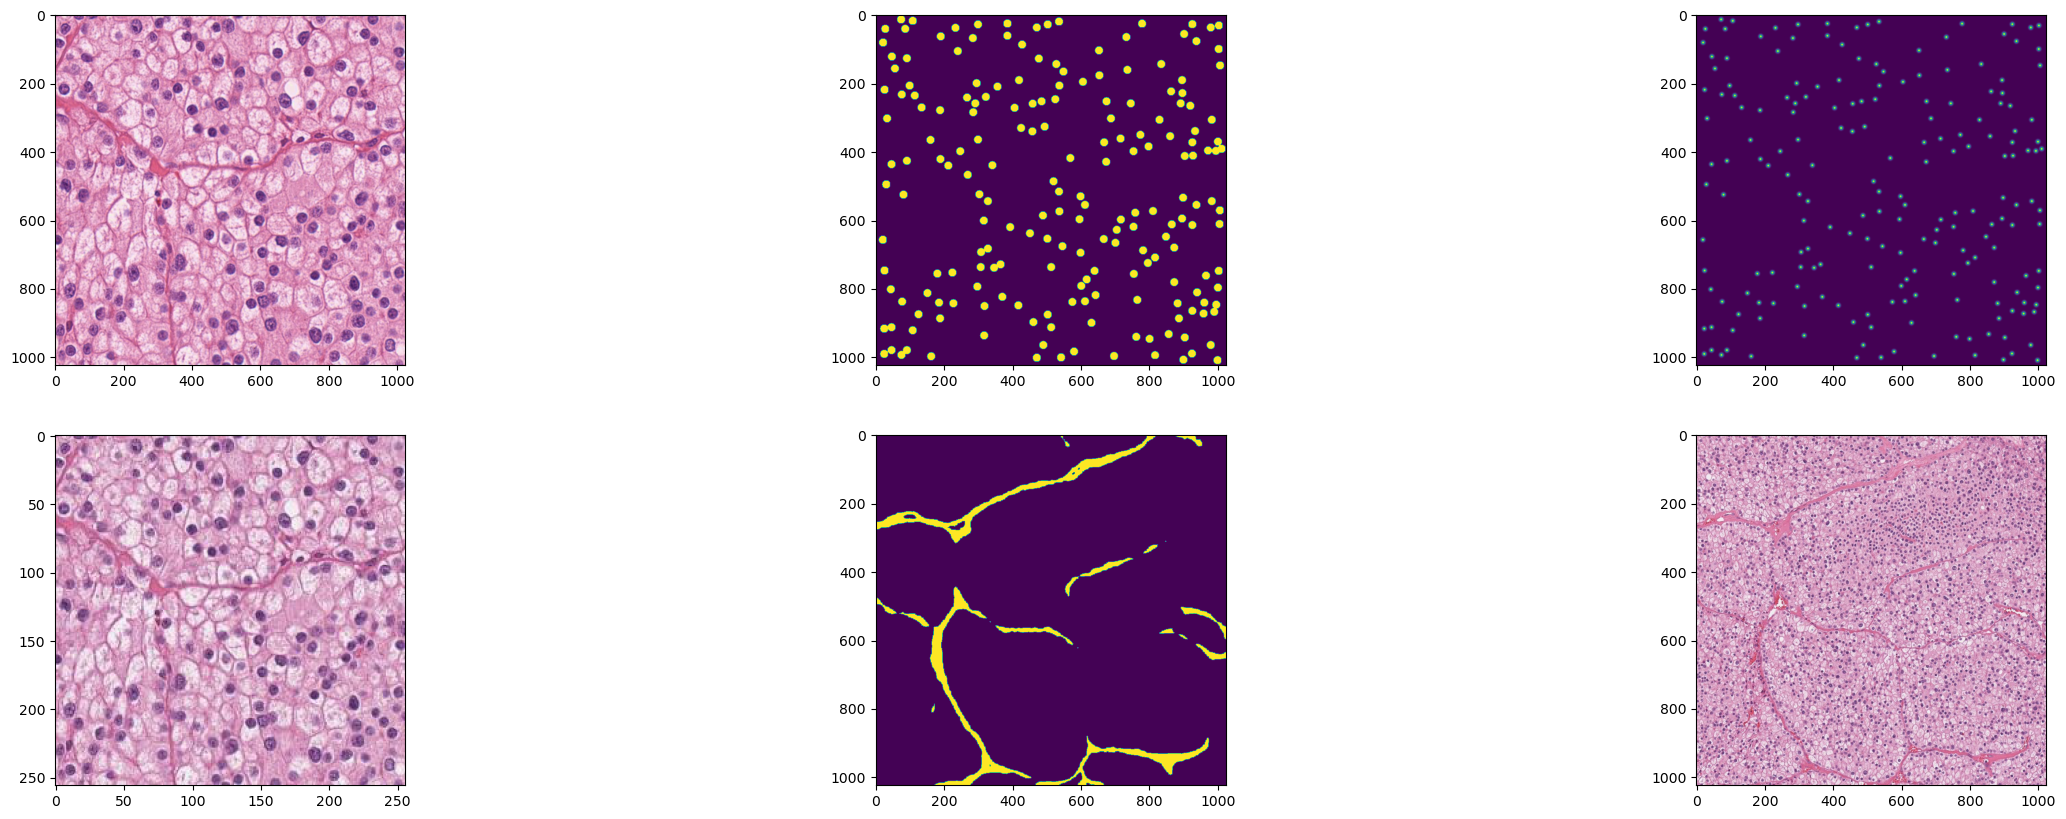

In [6]:
idx = 3
image = train_set[idx]['images'].numpy().transpose(1,2,0)
gt = train_set[idx]['gt'].numpy()
heatmap = train_set[idx]['heatmap'].numpy()
tissue_img = train_set[idx]['tissue_img'].numpy().transpose(1,2,0)
tissue_mask = train_set[idx]['tissue_mask'].numpy()
# pair_map = train_set[idx]['pair_map'].numpy()

x = train_set[idx]['roi_loc'][1]
y = train_set[idx]['roi_loc'][0]

fig,axes = plt.subplots(2,3, figsize=(30,10))
axes[0,0].imshow(image)
axes[0,1].imshow(gt)
axes[0,2].imshow(heatmap)
axes[1,0].imshow(tissue_img[x-128:x+128,y-128:y+128])
axes[1,1].imshow(tissue_mask)
axes[1,2].imshow(tissue_img)

In [7]:
# folddir_10 = glob.glob(os.path.join(datadir, '*_fold'))

# for folddir in folddir_10:
#     savedir_base = os.path.join(folddir,'Resu lt')
#     os.makedirs(savedir_base,exist_ok=True)


savedir_base = "./Result" 
os.makedirs(savedir_base,exist_ok=True)
trainval(exp_dict, savedir_base, datadir, reset=False, num_workers=8)

Experiment saved in ./Result/c95eff8b3e6873a0e6479b0b5f78590a
Starting experiment at epoch 0


  0%|          | 0/33 [00:00<?, ?it/s]

RuntimeError: CUDA out of memory. Tried to allocate 768.00 MiB (GPU 0; 23.70 GiB total capacity; 21.54 GiB already allocated; 392.56 MiB free; 21.66 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF